In [2]:
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)

In [3]:
DATA_FILE = "data\main-table.csv"

COLS = {
    'Region', 'Year', 'TotalTourists', 'ForeignTourists', 'HousesWithInternet%',
    'CompaniesWithWebSites%', 'AmountOfPeopleWithHighEducation',
    'PeopleWithHighEducationWithoutJob', 'AmountOfPeopleWithSecondaryEducation',
    'PeopleWithSecondaryEducationWithoutJob', 'AmountOfPeopleWithoutEducation',
    'PeopleWithoutEducationWithoutJob', 'AmountOfMales',
    'AmountOfMalesWithoutJob', 'AmountOfFemales',
    'AmountOfFemalesWithoutJob', 'AmountOfPeopleInRegion',
    'AmountOfPeopleInRegionWithoutJob', 'AmountOf_15-24_PeopleInRegion',
    'AmountOf_15-24_PeopleInRegionWithoutJob', 'AmountOf_15-64_PeopleInRegion',
    'AmountOf_15-64_PeopleInRegionWithoutJob', 'AmountOf_25-34_PeopleInRegion',
    'AmountOf_25-34_PeopleInRegionWithoutJob', 'AmountOf_35-44_PeopleInRegion',
    'AmountOf_35-44_PeopleInRegionWithoutJob', 'AmountOf_45-54_PeopleInRegion',
    'AmountOf_45-54_PeopleInRegionWithoutJob', 'AmountOf_55-64_PeopleInRegion',
    'AmountOf_55-64_PeopleInRegionWithoutJob', 'AmountOf_65+_PeopleInRegion'
}

DEPENDENT_COL = 'TotalTourists'

INDEX_COLS = {'Region', 'Year'}

REGIONS = { 
    "РЕПУБЛИКА СРБИЈА",
    "Београдски регион", 
    "Регион Војводине", 
    "Регион Шумадије и Западне Србије", 
    "Регион Јужне и Источне Србије" 
}

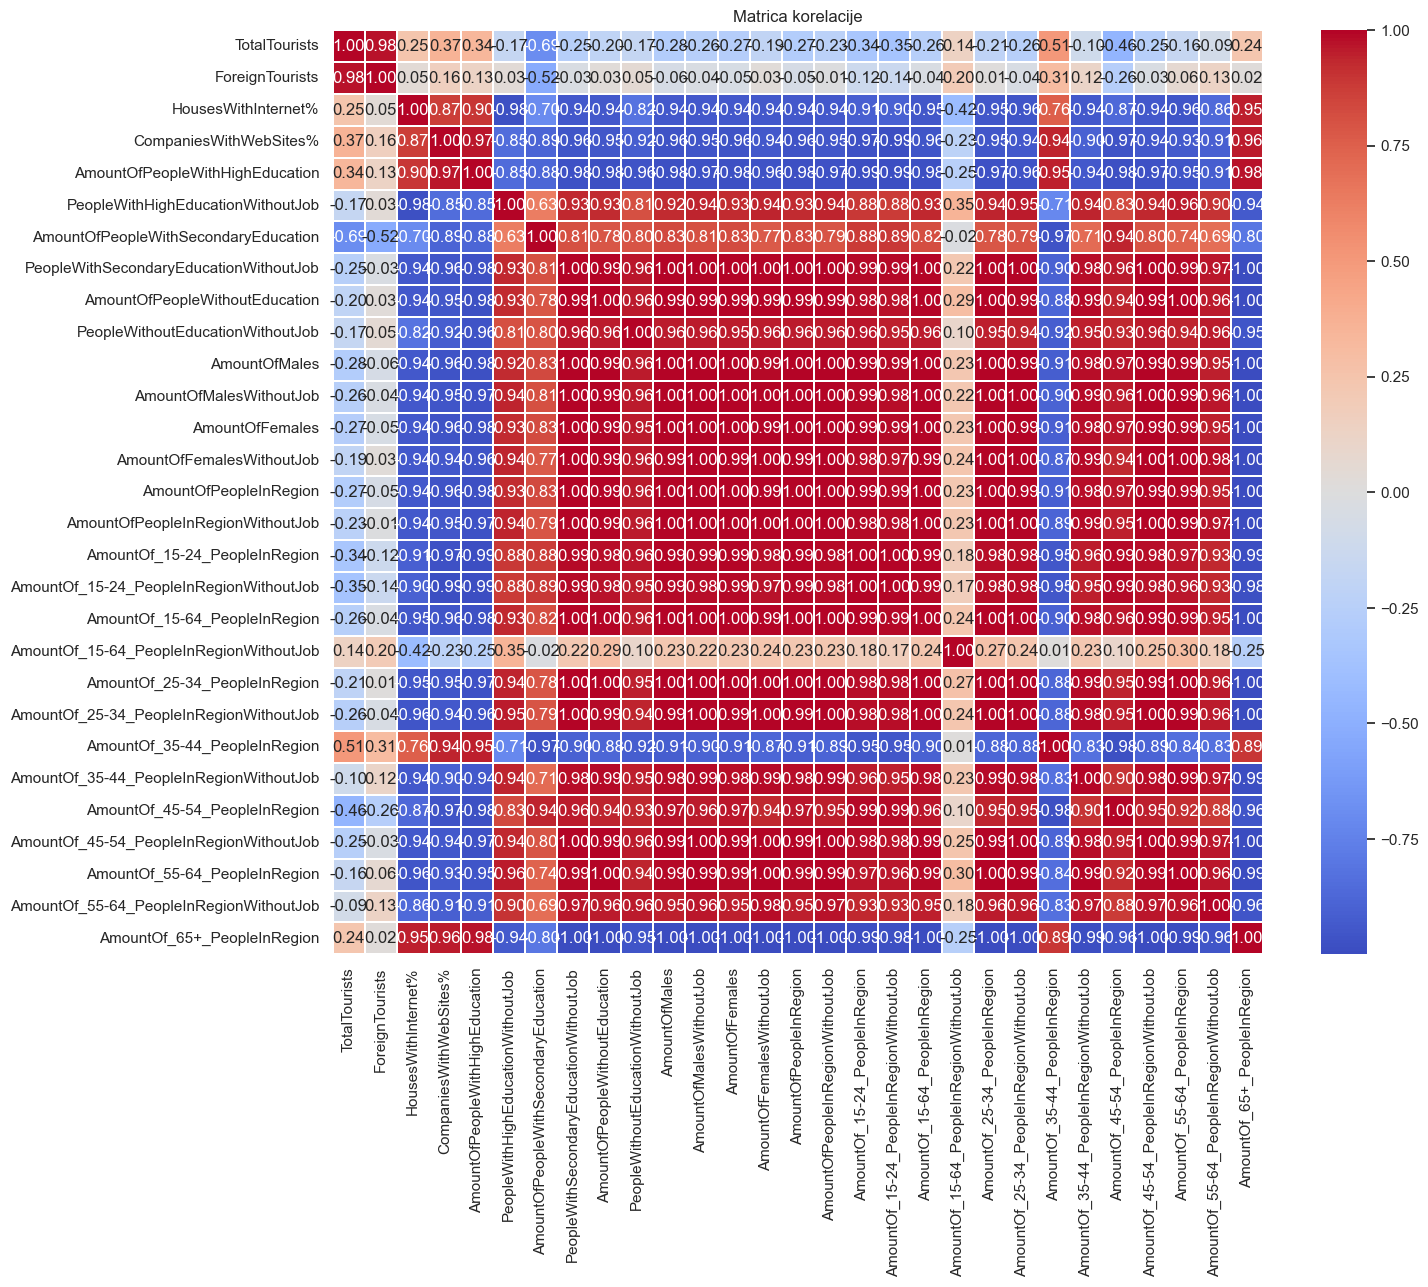

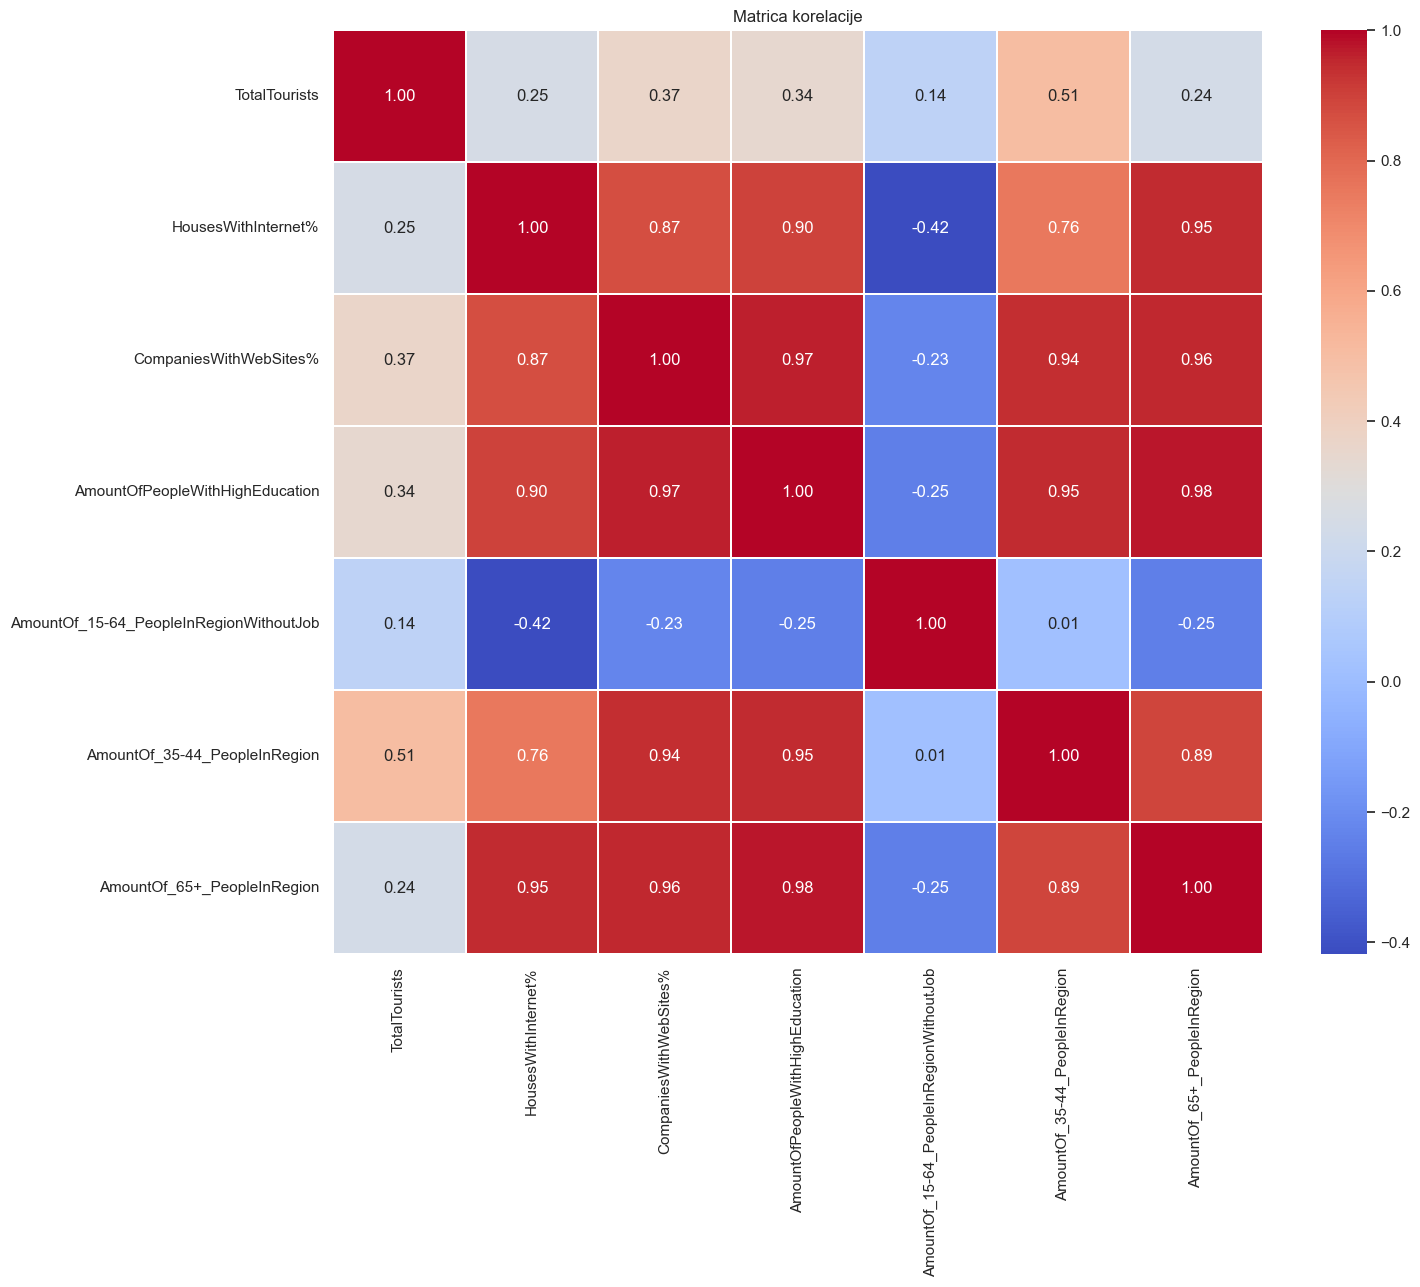

C:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


TotalTourists  ForeignTourists  HousesWithInternet%  \
Region           Year                                                        
РЕПУБЛИКА СРБИЈА 2014        2192268          1028732                 55.1   
                 2015        2437165          1132221                 56.0   
                 2016        2753591          1281426                 57.8   
                 2017        3085866          1497173                 61.9   
                 2018        3430522          1710514                 72.5   
                 2019        3689983          1846551                 79.6   
                 2020        1820021           445711                 80.8   

                       CompaniesWithWebSites%  \
Region           Year                           
РЕПУБЛИКА СРБИЈА 2014                    74.0   
                 2015                    75.2   
                 2016                    80.8   
                 2017                    80.4   
                 2018                    82.6   
                 2019                    83.6   
                 2020                    84.4   

                       AmountOfPeopleWithHighEducation  \
Region           Year                                    
РЕПУБЛИКА СРБИЈА 2014                        1039600.0   
                 2015                        1087700.0   
                 2016                        1114000.0   
                 2017                        1122700.0   
                 2018                        1149800.0   
                 2019                        1162600.0   
                 2020                        1174700.0   

                       PeopleWithHighEducationWithoutJob  \
Region           Year                                      
РЕПУБЛИКА СРБИЈА 2014                           110300.0   
                 2015                           116000.0   
                 2016                           108700.0   
                 2017                            98900.0   
                 2018                            90200.0   
                 2019                            69600.0   
                 2020                            65600.0   

                       AmountOfPeopleWithSecondaryEducation  \
Region           Year                                         
РЕПУБЛИКА СРБИЈА 2014                             3141700.0   
                 2015                             3120600.0   
                 2016                             3099200.0   
                 2017                             3086700.0   
                 2018                             3074900.0   
                 2019                             3078600.0   
                 2020                             3095500.0   

                       PeopleWithSecondaryEducationWithoutJob  \
Region           Year                                           
РЕПУБЛИКА СРБИЈА 2014                                397200.0   
                 2015                                355900.0   
                 2016                                309500.0   
                 2017                                274300.0   
                 2018                                256300.0   
                 2019                                208200.0   
                 2020                                177500.0   

                       AmountOfPeopleWithoutEducation  \
Region           Year                                   
РЕПУБЛИКА СРБИЈА 2014                       1917900.0   
                 2015                       1851600.0   
                 2016                       1804400.0   
                 2017                       1775300.0   
                 2018                       1730400.0   
                 2019                       1682700.0   
                 2020                       1624000.0   

                       PeopleWithoutEducationWithoutJob  ...  \
Region           Year                                    ...   
РЕПУБЛИКА СРБИЈА 2

In [27]:
df = pd.read_csv(DATA_FILE, index_col=tuple(INDEX_COLS)).dropna()

region_dfs = df[df.index.get_level_values("Region") != "РЕПУБЛИКА СРБИЈА"].groupby("Region")
serbia_df = df[df.index.get_level_values("Region") == "РЕПУБЛИКА СРБИЈА"]

x = serbia_df.drop(columns=['TotalTourists'])
y = serbia_df['TotalTourists']

x_with_const = sm.add_constant(x)
all_vars_model = sm.OLS(y, x_with_const).fit()

correlation_matrix = serbia_df.corr() # racunamo matricu korelacije
plt.figure(figsize=(15, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Matrica korelacije')
plt.show()
# 
# unused_columns = set()
# for region in correlation_matrix.TotalTourists:
#     if float(region[1]) < 0.2:
#         unused_columns.add(region[0])
unused_columns = set()
for region in correlation_matrix.index:
    if correlation_matrix.loc[region, 'TotalTourists'] < 0.1:
        unused_columns.add(region)

serbia_df_ac = serbia_df.drop(columns=unused_columns).drop(columns=['ForeignTourists'])

x = serbia_df_ac.drop(columns=['TotalTourists'])
y = serbia_df_ac['TotalTourists']

x_with_const = sm.add_constant(x)
all_vars_model = sm.OLS(y, x_with_const).fit()

correlation_matrix = serbia_df_ac.corr() # racunamo matricu korelacije
plt.figure(figsize=(15, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Matrica korelacije')
plt.show()
# NOTE: here we could do extrapolation, for now we dropped all na

serbia_df.head(11)

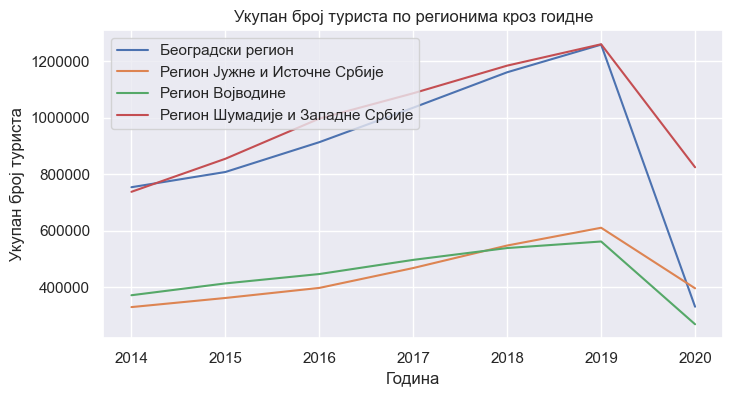

In [5]:
for region, region_df in region_dfs:
    plt.plot(region_df.index.get_level_values("Year"), region_df["TotalTourists"], label=region)

plt.xlabel("Година")
plt.ylabel("Укупан број туриста")
plt.title("Укупан број туриста по регионима кроз гоидне")
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [ ]:
def get_fitted_model(x, y):
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit()
    return model

In [1]:
# model
REGION = "Београдски регион"
region_df = region_dfs.get_group(REGION)
x = region_df[COLS - INDEX_COLS - {DEPENDENT_COL}]
y = region_df[DEPENDENT_COL]

model = get_fitted_model(x, y)
model.summary()

NameError: name 'region_dfs' is not defined

In [ ]:
correlation_matrix = region_df.corr()

sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title("Матрица корелације")
plt.show()

In [251]:
alpha = 5e-2

if model.f_pvalue <= alpha:
    print('bar jedna promenljiva X ima linearnu zavisnost sa promenljivom Y')
else:
    print('moguce je da ni jedna promenljiva nema znacajnu linearnu zavisnost sa Y')

model.rsquared # ??

moguce je da ni jedna promenljiva nema znacajnu linearnu zavisnost sa Y


1.0